<a href="https://colab.research.google.com/github/dblkI/cifras_diabetes_mx/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datos sobre la Diabetes en México


### Librerias

In [329]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importación de la data

In [330]:
from google.colab import drive
drive.mount('/content/drive')
ruta1 = '/content/drive/MyDrive/Work/diabetes_mexico/data/diabetes.csv'
ruta2 = '/content/drive/MyDrive/Work/diabetes_mexico/data/def_totales.csv'
data = pd.read_csv(ruta1)
def_totales = pd.read_csv(ruta2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [331]:
print(data.shape)
data.head()

(15504, 6)


,Estado,Enfermedad,Rango de edad,Año,Sexo,Numero de defunciones
0,Aguascalientes,Diabetes Mellitus,0 a 4 años,2010,Hombre,0
1,Aguascalientes,Diabetes Mellitus,5 a 9 años,2010,Hombre,0
2,Aguascalientes,Diabetes Mellitus,10 a 14 años,2010,Hombre,0
3,Aguascalientes,Diabetes Mellitus,15 a 19 años,2010,Hombre,0
4,Aguascalientes,Diabetes Mellitus,20 a 24 años,2010,Hombre,0


## Limpieza de datos

### Limpieza de data principal

In [332]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15504 entries, 0 to 15503
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Estado                 15504 non-null  object
 1   Enfermedad             15504 non-null  object
 2   Rango de edad          15504 non-null  object
 3   Año                    15504 non-null  int64 
 4   Sexo                   15504 non-null  object
 5   Numero de defunciones  15504 non-null  object
dtypes: int64(1), object(5)
memory usage: 726.9+ KB


Observaciones.

*   De la información obtenida de la data podemos ver que no tenemos celdas vacías, en todas las columnas tenemos 15504 valores.
*   La columna 'Numero de defunciones' está marcarda como 'object' porque contiene datos que representan los millaras con comas (,) por lo que esto también se debe corregir.


In [333]:
data.dropna(inplace = True)
data.dropna(subset=['Numero de defunciones'])
data['Numero de defunciones'] = data['Numero de defunciones'].str.replace(',', '')
data['Numero de defunciones'] = data['Numero de defunciones'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15504 entries, 0 to 15503
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Estado                 15504 non-null  object
 1   Enfermedad             15504 non-null  object
 2   Rango de edad          15504 non-null  object
 3   Año                    15504 non-null  int64 
 4   Sexo                   15504 non-null  object
 5   Numero de defunciones  15504 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 726.9+ KB


In [334]:
cols_cat = ['Estado', 'Rango de edad', 'Sexo']
cols_num = ['Año', 'Numero de defunciones']

for col in cols_cat:
  print(f'Columna {col}:{data[col].nunique()} subniveles')

Columna Estado:34 subniveles
Columna Rango de edad:19 subniveles
Columna Sexo:2 subniveles


Observaciones.


*   La columna 'Enfermedad' muestra un sólo subnivel ya que sólo estamos revisando la Dataset de Diabetes, por lo que no encontramos información valiosa en ella.
*   En la columna 'Estado' vemos 34 valores, sabemos que México sólo tiene 32 entidades federativas por lo que analizaremos estos rangos atípicos.



In [335]:
# Eliminar columnas que sólo tengan un subnivel.
# En este caso es la columna: 'Enfermedad'.
coluni = data.columns[data.nunique() == 1]
data = data.drop(coluni, axis = 1)

# Debemos eliminar valores que no sean estados de la columna 'Estado' por lo
# que vamos a comprobar los valores que existan en esta columna.
print(data['Estado'].unique())

# Los valores 'Extranjero' y 'No especificado' no aportan nada relevante para 
# nuestro análisis por lo que se determino que pueden removerse.
# data['Estado'] = data['Estado'].str.replace('Extranjero','No especificado', regex = False)
data = data.drop(data[data['Estado'] == 'Extranjero'].index)
data = data.drop(data[data['Estado'] == 'No especificado'].index)

# Comprobamos resultados finales.
print(data['Estado'].unique())

['Aguascalientes' 'Baja California' 'Baja California Sur' 'Campeche'
 'Coahuila de Zaragoza' 'Colima' 'Chiapas' 'Chihuahua' 'Ciudad de México'
 'Durango' 'Guanajuato' 'Guerrero' 'Hidalgo' 'Jalisco' 'México'
 'Michoacán de Ocampo' 'Morelos' 'Nayarit' 'Nuevo León' 'Oaxaca' 'Puebla'
 'Querétaro' 'Quintana Roo' 'San Luis Potosí' 'Sinaloa' 'Sonora' 'Tabasco'
 'Tamaulipas' 'Tlaxcala' 'Veracruz de Ignacio de la Llave' 'Yucatán'
 'Zacatecas' 'Extranjero' 'No especificado']
['Aguascalientes' 'Baja California' 'Baja California Sur' 'Campeche'
 'Coahuila de Zaragoza' 'Colima' 'Chiapas' 'Chihuahua' 'Ciudad de México'
 'Durango' 'Guanajuato' 'Guerrero' 'Hidalgo' 'Jalisco' 'México'
 'Michoacán de Ocampo' 'Morelos' 'Nayarit' 'Nuevo León' 'Oaxaca' 'Puebla'
 'Querétaro' 'Quintana Roo' 'San Luis Potosí' 'Sinaloa' 'Sonora' 'Tabasco'
 'Tamaulipas' 'Tlaxcala' 'Veracruz de Ignacio de la Llave' 'Yucatán'
 'Zacatecas']


In [336]:
# Se cambiaron los siguientes nombres de estados.
# Coahuila de Zaragoza -> Coahuila
data['Estado'] = data['Estado'].str.replace('Coahuila de Zaragoza','Coahuila', regex = False)
# México -> Estado de México
# data['Estado'] = data['Estado'].str.replace('México','Estado de México', regex = False)
# Michoacan de Ocampo -> Michoacan
data['Estado'] = data['Estado'].str.replace('Michoacán de Ocampo','Michoácan', regex = False)
# Veracruz de Ignacio de la Llave -> Veracruz
data['Estado'] = data['Estado'].str.replace('Veracruz de Ignacio de la Llave','Veracruz', regex = False)

print(data['Estado'].unique())

['Aguascalientes' 'Baja California' 'Baja California Sur' 'Campeche'
 'Coahuila' 'Colima' 'Chiapas' 'Chihuahua' 'Ciudad de México' 'Durango'
 'Guanajuato' 'Guerrero' 'Hidalgo' 'Jalisco' 'México' 'Michoácan'
 'Morelos' 'Nayarit' 'Nuevo León' 'Oaxaca' 'Puebla' 'Querétaro'
 'Quintana Roo' 'San Luis Potosí' 'Sinaloa' 'Sonora' 'Tabasco'
 'Tamaulipas' 'Tlaxcala' 'Veracruz' 'Yucatán' 'Zacatecas']


In [337]:
print(data['Rango de edad'].unique())
data = data.drop(data[data['Rango de edad'] == 'No especificado'].index)
data['Rango de edad'] = data['Rango de edad'].str.split().str[0]
data['Rango de edad'] = data['Rango de edad'].astype('int64')
print(data['Rango de edad'].unique())

['0 a 4 años' '5 a 9 años' '10 a 14 años' '15 a 19 años' '20 a 24 años'
 '25 a 29 años' '30 a 34 años' '35 a 39 años' '40 a 44 años'
 '45 a 49 años' '50 a 54 años' '55 a 59 años' '60 a 64 años'
 '65 a 69 años' '70 a 74 años' '75 a 79 años' '80 a 84 años'
 '85 años y más' 'No especificado']
[ 0  5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85]


Una vez que hemos eliminado las columnas y filas que no contenían información util podemos eliminar las filas repetidas que existan.

In [338]:
print(data.shape)
data.drop_duplicates()
print(data.shape)

(13824, 5)
(13824, 5)


Observaciones.


*   No tenemos celdas con datos repetidos.

Analizamos las columnas con información numérica para ver si en esta primera observación notamos algo inusual.

In [339]:
data.describe()

,Rango de edad,Año,Numero de defunciones
count,13824.000000,13824.000000,13824.000000
mean,42.500000,2015.500000,89.468750
std,25.941576,3.452177,160.215066
min,0.000000,2010.000000,0.000000
25%,20.000000,2012.750000,2.000000
50%,42.500000,2015.500000,27.000000
75%,65.000000,2018.250000,111.250000
max,85.000000,2021.000000,2119.000000


In [340]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13824 entries, 0 to 14590
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Estado                 13824 non-null  object
 1   Rango de edad          13824 non-null  int64 
 2   Año                    13824 non-null  int64 
 3   Sexo                   13824 non-null  object
 4   Numero de defunciones  13824 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 648.0+ KB


Exportación en caso de ser requerida para vizualización.

In [341]:
ruta = '/content/drive/MyDrive/Work/diabetes_mexico/data/diabetes_clean.csv'
data.to_csv(ruta)

### Limpieza de data def_totales

In [342]:
del cols_cat
del cols_num
def_totales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Estado                 816 non-null    object
 1   Sexo                   816 non-null    object
 2   Año                    816 non-null    int64 
 3   Número de defunciones  816 non-null    object
dtypes: int64(1), object(3)
memory usage: 25.6+ KB


In [343]:
def_totales.dropna(inplace = True)
def_totales.dropna(subset=['Número de defunciones'])
def_totales['Número de defunciones'] = def_totales['Número de defunciones'].str.replace(',', '')
def_totales['Número de defunciones'] = def_totales['Número de defunciones'].astype('int64')
def_totales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Estado                 816 non-null    object
 1   Sexo                   816 non-null    object
 2   Año                    816 non-null    int64 
 3   Número de defunciones  816 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 25.6+ KB


In [344]:
# Debemos eliminar valores que no sean estados de la columna 'Estado' por lo
# que vamos a comprobar los valores que existan en esta columna.
print(def_totales['Estado'].unique())

# Los valores 'Extranjero' y 'No especificado' no aportan nada relevante para 
# nuestro análisis por lo que se determino que pueden removerse.
# data['Estado'] = data['Estado'].str.replace('Extranjero','No especificado', regex = False)
def_totales = def_totales.drop(def_totales[def_totales['Estado'] == 'Extranjero'].index)
def_totales = def_totales.drop(def_totales[def_totales['Estado'] == 'No especificado'].index)

# Comprobamos resultados finales.
print(def_totales['Estado'].unique())

['Aguascalientes' 'Baja California' 'Baja California Sur' 'Campeche'
 'Coahuila de Zaragoza' 'Colima' 'Chiapas' 'Chihuahua' 'Ciudad de México'
 'Durango' 'Guanajuato' 'Guerrero' 'Hidalgo' 'Jalisco' 'México'
 'Michoacán de Ocampo' 'Morelos' 'Nayarit' 'Nuevo León' 'Oaxaca' 'Puebla'
 'Querétaro' 'Quintana Roo' 'San Luis Potosí' 'Sinaloa' 'Sonora' 'Tabasco'
 'Tamaulipas' 'Tlaxcala' 'Veracruz de Ignacio de la Llave' 'Yucatán'
 'Zacatecas' 'Extranjero' 'No especificado']
['Aguascalientes' 'Baja California' 'Baja California Sur' 'Campeche'
 'Coahuila de Zaragoza' 'Colima' 'Chiapas' 'Chihuahua' 'Ciudad de México'
 'Durango' 'Guanajuato' 'Guerrero' 'Hidalgo' 'Jalisco' 'México'
 'Michoacán de Ocampo' 'Morelos' 'Nayarit' 'Nuevo León' 'Oaxaca' 'Puebla'
 'Querétaro' 'Quintana Roo' 'San Luis Potosí' 'Sinaloa' 'Sonora' 'Tabasco'
 'Tamaulipas' 'Tlaxcala' 'Veracruz de Ignacio de la Llave' 'Yucatán'
 'Zacatecas']


In [345]:
# Se cambiaron los siguientes nombres de estados.
# Coahuila de Zaragoza -> Coahuila
def_totales['Estado'] = def_totales['Estado'].str.replace('Coahuila de Zaragoza','Coahuila', regex = False)
# México -> Estado de México
# data['Estado'] = data['Estado'].str.replace('México','Estado de México', regex = False)
# Michoacan de Ocampo -> Michoacan
def_totales['Estado'] = def_totales['Estado'].str.replace('Michoacán de Ocampo','Michoácan', regex = False)
# Veracruz de Ignacio de la Llave -> Veracruz
def_totales['Estado'] = def_totales['Estado'].str.replace('Veracruz de Ignacio de la Llave','Veracruz', regex = False)

print(def_totales['Estado'].unique())

['Aguascalientes' 'Baja California' 'Baja California Sur' 'Campeche'
 'Coahuila' 'Colima' 'Chiapas' 'Chihuahua' 'Ciudad de México' 'Durango'
 'Guanajuato' 'Guerrero' 'Hidalgo' 'Jalisco' 'México' 'Michoácan'
 'Morelos' 'Nayarit' 'Nuevo León' 'Oaxaca' 'Puebla' 'Querétaro'
 'Quintana Roo' 'San Luis Potosí' 'Sinaloa' 'Sonora' 'Tabasco'
 'Tamaulipas' 'Tlaxcala' 'Veracruz' 'Yucatán' 'Zacatecas']


In [355]:
# Se cambiaron los siguientes nombres de sexos.
# Hombres -> Hombre
def_totales['Sexo'] = def_totales['Sexo'].str.replace('Hombres','Hombre', regex = False)
# Mujeres -> Mujer
def_totales['Sexo'] = def_totales['Sexo'].str.replace('Mujeres','Mujer', regex = False)
print(def_totales['Sexo'].unique())

['Hombre' 'Mujer']


In [364]:
print(def_totales['Año'].unique())

[2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]


Exportación en caso de ser requerida para vizualización.

In [347]:
ruta = '/content/drive/MyDrive/Work/diabetes_mexico/data/def_totales_clean.csv'
def_totales.to_csv(ruta)

## Exploración de datos

La pregunta que debemos reponder es: ¿Cuántos hombres y mujeres de edades entre 30 y 59 años fallecieron a causa de la diabetes en cada estado de la Republica Mexicana en 2010 y 2021?

Con base en esto, se estimará una proyección hacia 2022

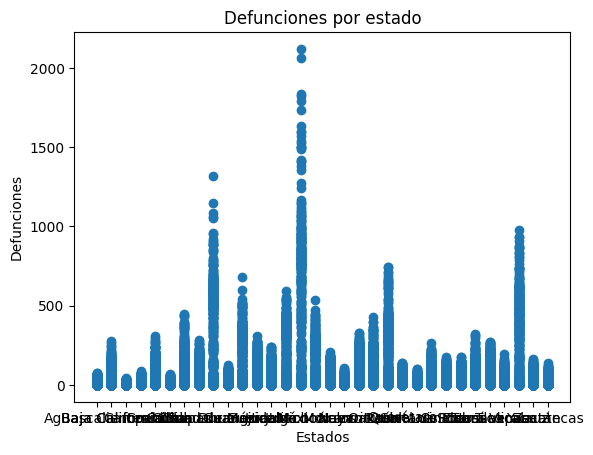

In [348]:
plt.plot(data['Estado'], data['Numero de defunciones'], 'o')
plt.xlabel('Estados')
plt.ylabel('Defunciones')
plt.title('Defunciones por estado')
plt.show()

In [379]:
from matplotlib._api import define_aliases
# Bucle para revisar todos los estados.

estados = data['Estado'].unique()
sexos = data['Sexo'].unique()
años = [data['Año'].unique()[0],data['Año'].unique()[-1]]



for estado in estados:
  print('\n',estado)
  for sexo in sexos:
    print('\n',sexo)
    for año in años:
      estado_sexo_año = data[(data['Estado'] == estado) & (data['Sexo'] == sexo) & (data['Rango de edad'] > 25) & (data['Rango de edad'] < 60) & (data['Año'] == año)]
      d_estado_sexo_año = def_totales[(def_totales['Estado'] == estado) & (def_totales['Sexo'] ==sexo) & (def_totales['Año'] == año)]
      d = int(d_estado_sexo_año['Número de defunciones'].unique())

      sum_def = estado_sexo_año['Numero de defunciones'].sum()
      print('Defunciones en ',año,': ',sum_def,' por diabetes')
      print('Defunciones en ',año,': ',d,'totales')
      



 Aguascalientes

 Hombre
Defunciones en  2010 :  109  por diabetes
Defunciones en  2010 :  2721 totales
Defunciones en  2021 :  126  por diabetes
Defunciones en  2021 :  5457 totales

 Mujer
Defunciones en  2010 :  92  por diabetes
Defunciones en  2010 :  2449 totales
Defunciones en  2021 :  73  por diabetes
Defunciones en  2021 :  4255 totales

 Baja California

 Hombre
Defunciones en  2010 :  306  por diabetes
Defunciones en  2010 :  9561 totales
Defunciones en  2021 :  509  por diabetes
Defunciones en  2021 :  17937 totales

 Mujer
Defunciones en  2010 :  204  por diabetes
Defunciones en  2010 :  5822 totales
Defunciones en  2021 :  276  por diabetes
Defunciones en  2021 :  10655 totales

 Baja California Sur

 Hombre
Defunciones en  2010 :  50  por diabetes
Defunciones en  2010 :  1478 totales
Defunciones en  2021 :  61  por diabetes
Defunciones en  2021 :  3605 totales

 Mujer
Defunciones en  2010 :  26  por diabetes
Defunciones en  2010 :  954 totales
Defunciones en  2021 :  52 

In [374]:
d = def_totales[(def_totales['Estado'] == 'Aguascalientes') & (def_totales['Sexo'] == 'Hombre') & (def_totales['Año'] == 2010)]
#d = def_totales[def_totales['Año'] == 2010]
d = int(d['Número de defunciones'].unique())
print(d)

2721
